In [313]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

cancer = datasets.load_breast_cancer()
cancer.data.shape, cancer.target.shape

((569, 30), (569,))

In [314]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.4, random_state=0)

In [315]:
X_train.shape, y_train.shape , X_test.shape, y_test.shape

((341, 30), (341,), (228, 30), (228,))

## Cross Validation
* kernel = `rbf` , `linear`
* https://scikit-learn.org/stable/modules/cross_validation.html
* https://datascienceschool.net/view-notebook/ff4b5d491cc34f94aea04baca86fbef8/

In [347]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import StandardScaler  ,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.multiclass import OneVsRestClassifier

from sklearn.impute import SimpleImputer
##
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score , ShuffleSplit
from sklearn import metrics
from sklearn.metrics import roc_curve , roc_auc_score , f1_score , classification_report
## plot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##Model classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import GradientBoostingClassifier as GBM
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier 

def rocvis(true , prob , label ) :
    AUC = np.mean(true == np.round(prob.ravel()).astype(int))
    if type(true[0]) == str :
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        true = le.fit_transform(true)
    else :
        pass
    fpr, tpr, thresholds = roc_curve(true, prob)
    plt.plot(fpr, tpr, marker='.', label =  "AUC : {:.2f} , {}".format(AUC,label)   )
    

## 전처리 표준화나 Numeric Category 분리해서 하는 경우
* https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

In [348]:
## numeric 있는 경우
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
## category 있는 경우 
categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs'))])

param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1.0, 10, 100],
}

#grid_search = GridSearchCV(clf, param_grid, cv=10, iid=False)
#grid_search.fit(X_train, y_train)



## Classifier 모델 비교 
* 모델 여러개 https://www.kdnuggets.com/2018/01/managing-machine-learning-workflows-scikit-learn-pipelines-part-3.html

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  50 out of  50 | elapsed:    1.6s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 180 out of 180 | elapsed:    1.3s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  36 out of  75 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  75 out of  75 | elapsed:    0.1s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 out of  25 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=20)]: Using backend

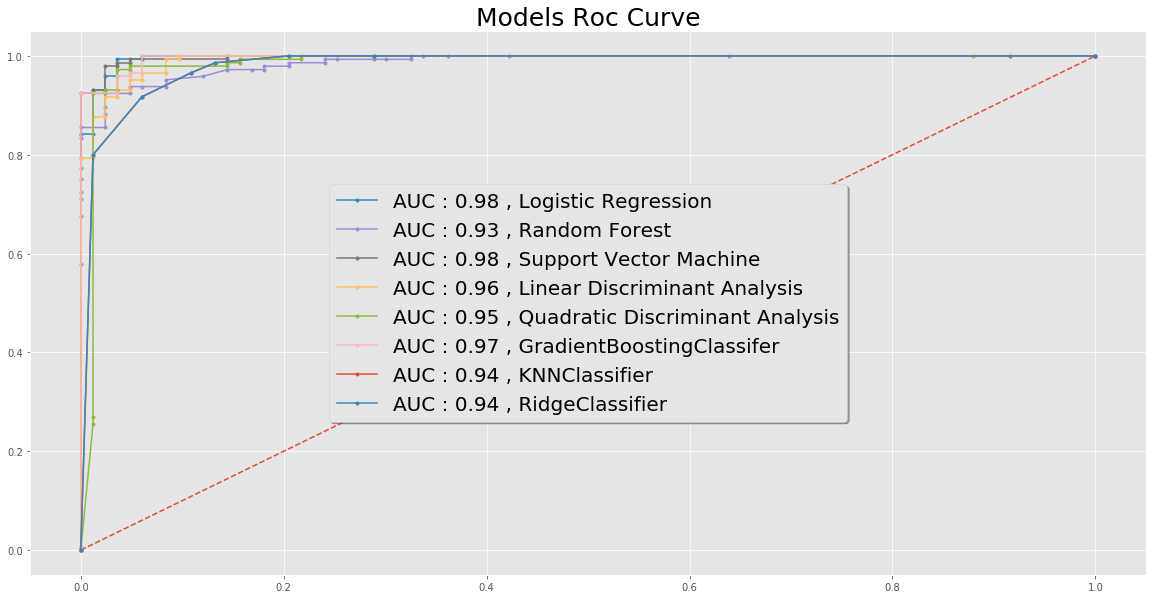

In [317]:
import warnings
warnings.filterwarnings("ignore")
from pycm import * 

cv = ShuffleSplit(n_splits=5 , test_size=0.3, random_state=42)

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=42 ,))])

pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=42 , probability = True))])

pipe_lda = Pipeline([('scl', StandardScaler()),
                     ('clf', LDA(n_components = 2 ))])

pipe_qda = Pipeline([('scl', StandardScaler()),
                     ('clf', QDA())])

pipe_gbm = Pipeline([('scl', StandardScaler()),
                     ('clf', GBM(n_estimators  = 1000 , random_state = 42))])
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('clf', KNN())])

pipe_ridge = Pipeline([('scl', StandardScaler()),
                     ('clf', RidgeClassifier())])


aram_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
depth_range = [7,8,9]
min_samples_split_range = [0.5, 0.7 , 0.9]
param_range = [0.5, 0.1]
param_range_fl = np.logspace(0,-5,5)

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                   'clf__C': param_range_fl,
                   'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': depth_range,
                   'clf__min_samples_split': min_samples_split_range }]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
                    'clf__C': param_range}]

grid_params_lda = [{"clf__tol" : param_range_fl , 
                    "clf__solver" : ["svd","lsqr","eigen"]} ]

grid_params_qda = [{"clf__tol" : param_range_fl} ]

grid_params_gbm = [{"clf__tol" : param_range_fl , 
                    'clf__max_depth': depth_range,
                    'clf__min_samples_leaf': param_range,
                    'clf__loss' : ["deviance", "exponential"],
                   } ]

grid_params_knn = [{"clf__n_neighbors" : [2,4,6] , 
                    "clf__weights" : ["uniform","distance"] , 
                    'clf__algorithm': ["ball_tree", "kd_tree", "brute"],
                   } ]

grid_params_ridge = [
    {"clf__solver" : ["svd","cholesky","lsqr","sparse_cg" , "sag","saga"] ,
     "clf__tol" : param_range_fl , 
     "clf__alpha" : param_range_fl , 
    }
]


pipe = [
    pipe_lr , pipe_rf , pipe_svm , 
    pipe_lda , pipe_qda , pipe_gbm , 
    pipe_knn , pipe_ridge
       ]
params = [
    grid_params_lr , grid_params_rf , grid_params_svm , 
    grid_params_lda , grid_params_qda, grid_params_gbm , 
    grid_params_knn , grid_params_ridge , 
]

jobs = 20

grid_dict = {0: 'Logistic Regression', 
             1: 'Random Forest', 
             2: 'Support Vector Machine' ,
             3: "Linear Discriminant Analysis",
             4: "Quadratic Discriminant Analysis",
             5: "GradientBoostingClassifer" ,
             6: "KNNClassifier" , 
             7: "RidgeClassifier" , 
            }

model_prob = {}
model_result = {}
model_best_params = {}
model_confusion = {}
plt.style.use('ggplot')
fig , ax = plt.subplots(figsize= (20,10))
plt.plot([0, 1], [0, 1], linestyle='--')


for idx , (param , model) in enumerate(zip(params , pipe)) :
    search = GridSearchCV(model, param, iid=True , 
                          cv=cv , n_jobs=jobs , verbose=-1 )
    search.fit(X_train , y_train)
    y_pred = search.predict(X_test)
    try :
        y_prob = search.predict_proba(X_test)
    except Exception as e :
        pass
    rocvis(true = y_test , prob = y_prob[:,1] , label = grid_dict.get(idx) )
    model_result[grid_dict.get(idx)] = roc_auc_score(y_test, y_pred)  
    model_prob[grid_dict.get(idx)] = y_prob
    model_best_params[grid_dict.get(idx)] = search.best_params_
    model_confusion[grid_dict.get(idx)] = ConfusionMatrix(y_test, y_pred)
    
plt.legend(fontsize = 20 , loc='center', shadow=True )
plt.title("Models Roc Curve" , fontsize= 25)
plt.savefig("./Model_Result.png")
plt.show()

cp = Compare(model_confusion)


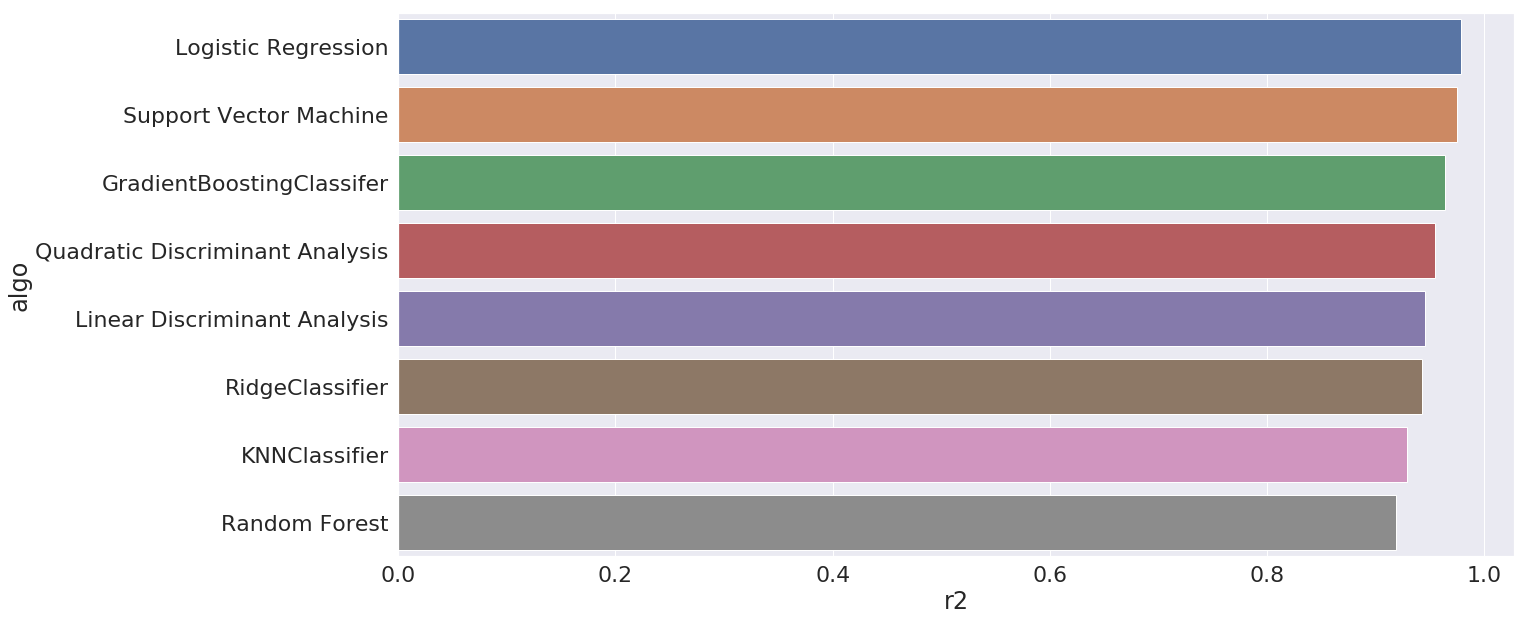

In [329]:
output = pd.DataFrame([model_result.keys() , model_result.values()], index = ["algo","r2"]).T
output.sort_values(["r2"], ascending= False ,inplace=True)
fig ,ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 2)
sns.barplot(y="algo", x="r2", data=output)
plt.show()

In [10]:
print(cp)
print(cp.best_name , "\n" , cp.best)

Best : None

Rank        Name                               Class-Score    Overall-Score
1           RidgeClassifier                    3.0            4.0
1           GradientBoostingClassifer          3.0            4.0
1           Quadratic Discriminant Analysis    3.0            4.0
1           Support Vector Machine             3.0            4.0
1           Logistic Regression                3.0            4.0
6           KNNClassifier                      2.75           4.0
6           Linear Discriminant Analysis       2.75           4.0
6           Random Forest                      2.75           4.0

None 
 None


In [230]:
model_best_params
model_prob
print(model_result)

{'Logistic Regression': 0.956958869962609, 'Random Forest': 0.9190693809721645, 'Support Vector Machine': 0.9750311591192355, 'Linear Discriminant Analysis': 0.9457831325301205, 'Quadratic Discriminant Analysis': 0.9543415039468217, 'GradientBoostingClassifer': 0.9690070627336933, 'KNNClassifier': 0.9268383880348983}


## SVM Pipe Line & Grid Search & N-fold

* OneVsRestClassifier 같은 것을 추가로 할 때 Grid Search 해야할 경우

In [119]:
svm = Pipeline([('scl', StandardScaler()) , ("clf", SVC(random_state=1 , probability = True))])
pipe_svc = Pipeline([('ova', OneVsRestClassifier(svm))])
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {'ova__estimator__clf__C': param_range, 'ova__estimator__clf__kernel': ['linear']},
    {'ova__estimator__clf__C': param_range, 'ova__estimator__clf__gamma': param_range, 'ova__estimator__clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, 
                  scoring='accuracy', cv=cv , n_jobs=10)

In [120]:
gs.fit(X_train , y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('ova',
                                        OneVsRestClassifier(estimator=Pipeline(memory=None,
                                                                               steps=[('scl',
                                                                                       StandardScaler(copy=True,
                                                                                                      with_mean=True,
                                                                                                      with_std=True)),
                                                                                      ('clf',
                                                                                       SVC(C=1.0,
                                            

## Parameter 정보 체크

In [62]:
#gs.cv_results_["params"]
#gs.cv_results_["mean_test_score"]

In [121]:
print(gs.best_score_)
print(gs.best_params_)

0.9805825242718447
{'ova__estimator__clf__C': 0.1, 'ova__estimator__clf__kernel': 'linear'}


## 확률값과 예측값 뽑기 

In [122]:
##prob
y_prob = gs.predict_proba(X_test)
##predict
y_pred = gs.predict(X_test)
y_score = gs.decision_function(X_test)

In [124]:
target_names = ["class 0", "class 1"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.96      0.97        83
     class 1       0.98      0.99      0.98       145

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228



In [125]:
f1_score(y_test, y_pred, average='macro')  
f1_score(y_test, y_pred, average='micro')  
f1_score(y_test, y_pred, average='weighted')  

0.9780414015357043

In [126]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    from sklearn.preprocessing import LabelBinarizer
    from sklearn.metrics import roc_auc_score 
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
multiclass_roc_auc_score(y_test, y_pred, average="macro")

0.9750311591192355

## 모델 비교해서 가장 좋은 것 찾기

## 회귀문제

* https://datascienceschool.net/view-notebook/83d5e4fff7d64cb2aecfd7e42e1ece5e/
* lasso https://datascienceschool.net/view-notebook/83d5e4fff7d64cb2aecfd7e42e1ece5e/
* pls https://www.idtools.com.au/partial-least-squares-regression-python/

In [54]:
boston = datasets.load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.4, random_state=0)

In [55]:
X_train.shape, y_train.shape , X_test.shape, y_test.shape

((303, 13), (303,), (203, 13), (203,))

In [331]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

In [332]:
# 
cv = ShuffleSplit(n_splits=5 , test_size=0.3, random_state=42)
pipe_linear = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', LinearRegression())])
pipe_lasso = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Lasso(random_state = 42))])
pipe_ridge = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Ridge(random_state = 42))])
pipe_pca = Pipeline([
                ('scl', StandardScaler()),
                ('pca', PCA()),
                 ('fit', Ridge(random_state = 42))])
pipe_pls = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', PLS())])
pipe_gbr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', GBR())])
pipe_rfr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', RFR())])
pipe_svr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', SVR())])

pipe_KR = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', KernelRidge())])



In [338]:
grid_params_linear = [{
    "poly__degree" : np.arange(1,3), 
    "fit__fit_intercept" : [True, False], 
}]
grid_params_lasso = [{
    "poly__degree" : np.arange(1,3),
    "fit__tol" : np.logspace(-5,0,10) ,
    "fit__alpha" : np.logspace(-5,1,10) ,     
                     }]
grid_params_pca = [{
    "pca__n_components" : np.arange(2,8)
}]
grid_params_ridge = [{
    "poly__degree" : np.arange(1,3),
    "fit__alpha" : np.linspace(2,5,10) ,
    "fit__solver" : [ "cholesky","lsqr","sparse_cg"] ,
    "fit__tol" : np.logspace(-5,0,10) ,
                     }]
grid_params_pls = [{
    "fit__n_components" : np.arange(2,8)
}]
min_samples_split_range = [0.5, 0.7 , 0.9]

grid_params_gbr =[{
    "fit__max_features" : ["sqrt","log2"] ,
    "fit__loss" : ["ls","lad","huber","quantile"] , 
    "fit__max_depth" : [5,6,7,8] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_rfr =[{
    "fit__max_features" : ["sqrt","log2"] , 
    "fit__max_depth" : [5,6,7,8] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_svr =[{
    "fit__kernel" : ["rbf", "linear"] ,
    "fit__degree" : [2, 3, 5] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
grid_params_KR =[{
    "fit__kernel" : ["rbf","linear"] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
pipe = [
    pipe_linear , pipe_lasso ,  pipe_pca ,
    pipe_ridge , pipe_pls , pipe_gbr , 
    pipe_rfr , pipe_svr , pipe_KR 
]

params = [
    grid_params_linear , grid_params_lasso , grid_params_pca,
    grid_params_ridge , grid_params_pls , grid_params_gbr ,
    grid_params_rfr , grid_params_svr , grid_params_KR
]

jobs = 20

grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'pca regression' , 
    3: 'Ridge' ,
    4: 'PLSRegression',
    5: "GradientDescentRegressor" ,
    6: "RandomForestRegressor" ,
    7: "SupportVectorRegressor" ,
    8: "Kernel RidgeRegression"
            }

model_mse = {}
model_r2 = {}
model_best_params = {}

for idx , (param , model) in enumerate(zip(params , pipe)) :
    search = GridSearchCV(model, param, iid=True , scoring  = "neg_mean_squared_error" , 
                          cv=cv , n_jobs=jobs , verbose=-1 )
    search.fit(X_train , y_train)
    y_pred = search.predict(X_test)
    model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)  
    model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)  
    model_best_params[grid_dict.get(idx)] = search.best_params_
print("finish")

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.3s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done 382 tasks      | elapsed:    5.6s
[Parallel(n_jobs=20)]: Done 1000 out of 1000 | elapsed:   11.0s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    4.3s
[Parallel(n_jobs=20)]: Done 829 tasks      | elapsed:   28.7s
[Parallel(n_jobs=20)]: Done 1200 tasks      | elapsed:   41.0s
[Parallel(n_jobs=20)]: Done 1704 tasks      | elapsed:   58.3s
[Parallel(n_jobs=20)]: Done 2352 tasks      | elapsed:  1.3min
[Parallel(n_jobs=20)]: Done 3000 out of 3000 | elapsed:  1.7min finished
[Parallel(n_jobs=20)]: Using 

finish


[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    1.4s finished


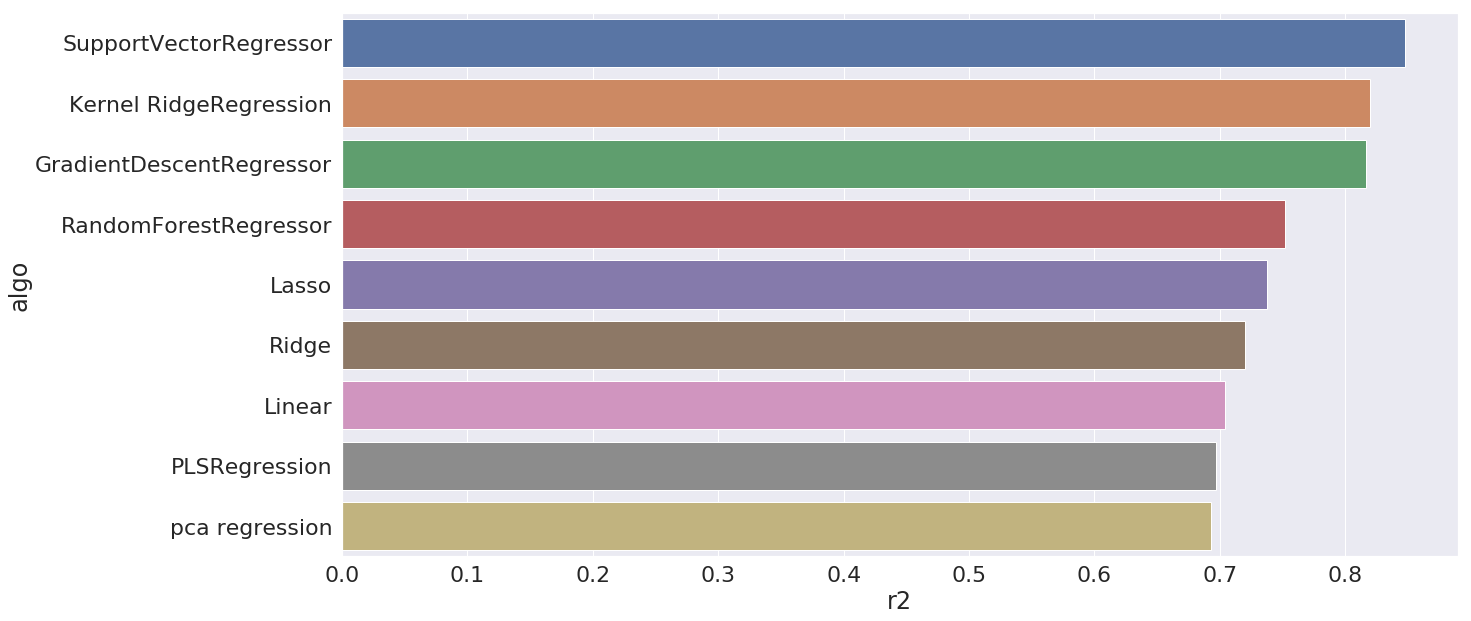

In [339]:
fig ,ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 2)
output = pd.DataFrame([model_r2.keys() , model_r2.values()], index = ["algo","r2"]).T
output.sort_values(["r2"], ascending= False ,inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output)
plt.show()

In [340]:
model_mse , model_r2

({'Linear': 0.06858735624203845,
  'Lasso': 0.06077583593898144,
  'pca regression': 0.07100857683527466,
  'Ridge': 0.06478180321242402,
  'PLSRegression': 0.07015012721985056,
  'GradientDescentRegressor': 0.0425592860038906,
  'RandomForestRegressor': 0.05741844509804851,
  'SupportVectorRegressor': 0.03535113185520088,
  'Kernel RidgeRegression': 0.04166105262240853},
 {'Linear': 0.7037436537693289,
  'Lasso': 0.7374847481967586,
  'pca regression': 0.6932854293140907,
  'Ridge': 0.7201813661657955,
  'PLSRegression': 0.6969934180808715,
  'GradientDescentRegressor': 0.8161693457726424,
  'RandomForestRegressor': 0.7519866680534313,
  'SupportVectorRegressor': 0.8473042593800779,
  'Kernel RidgeRegression': 0.8200491766079531})

In [341]:
model_best_params

{'Linear': {'fit__fit_intercept': False, 'poly__degree': 1},
 'Lasso': {'fit__alpha': 0.021544346900318822,
  'fit__tol': 0.0016681005372000592,
  'poly__degree': 2},
 'pca regression': {'pca__n_components': 7},
 'Ridge': {'fit__alpha': 2.888888888888889,
  'fit__solver': 'lsqr',
  'fit__tol': 0.0004641588833612782,
  'poly__degree': 1},
 'PLSRegression': {'fit__n_components': 3},
 'GradientDescentRegressor': {'fit__loss': 'ls',
  'fit__max_depth': 7,
  'fit__max_features': 'log2',
  'fit__min_samples_split': 0.7},
 'RandomForestRegressor': {'fit__max_depth': 6,
  'fit__max_features': 'sqrt',
  'fit__min_samples_split': 0.5},
 'SupportVectorRegressor': {'fit__degree': 2,
  'fit__gamma': 0.021544346900318822,
  'fit__kernel': 'rbf'},
 'Kernel RidgeRegression': {'fit__gamma': 0.021544346900318822,
  'fit__kernel': 'rbf'}}

In [342]:
search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_fit__gamma', 'param_fit__kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

## Parameter 1개인 경우

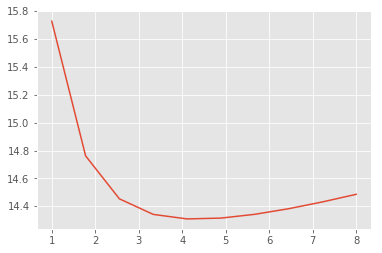

In [237]:
plt.plot(search.cv_results_["param_fit__alpha"].data , -search.cv_results_["mean_test_score"])

In [217]:
print(search.best_score_)
print(search.best_estimator_)

-14.308996349084987
Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('fit',
                 Ridge(alpha=4.488888888888889, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=42,
                       solver='auto', tol=0.001))],
         verbose=False)


In [133]:
np.logspace(-5,5,10)

array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05])